In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from DesignMat import Polynomial, Gaussian, Sigmoidal

np.random.seed(1234)

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

def create_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(*domain, sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

Example of basis functions: polynomial function $\phi_j({x}) = {x}^j$, and other nonlinear basis functions, such as Gaussian and Sigmoidal:
\begin{align}
\phi_j (x) = \exp \left\{ - \frac{(x-\mu_j)^2}{2s^2} \right\} \text{ or } \phi_j (x) = \sigma \left( \frac{x-\mu_j}{s} \right) \text{ where } \sigma(z) = \frac{1}{1+\exp(-z)} \nonumber
\end{align}

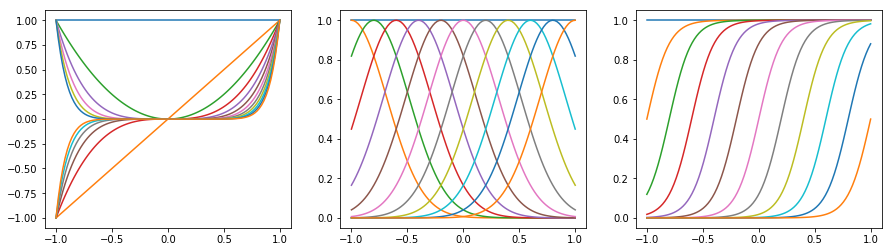

In [2]:
x = np.linspace(-1, 1, 100)

funcs = {'Polynomial': [11], 'Gaussian': [np.linspace(-1, 1, 11), 0.1],'Sigmoidal': [np.linspace(-1, 1, 11), 10]}

# call polynomial(11).dm(x), gaussian(-1,1,11).dm(x) etc.
# phi = [globals()[key.lower()](*value).dm(x) for key, value in funcs.items()]
phi = [globals()[key](*value).dm(x) for key, value in funcs.items()]
    
plt.figure(figsize=(15, 4))
for i, X in enumerate(phi):
    plt.subplot(1, 3, i + 1)
    for j in range(12):
        plt.plot(x, X[:, j])